In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

# renderizar os gráficos diretamento no notebook
# %matplotlib inline

In [ ]:
#importando os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Quantas variáveis (colunas) e quantas entradas (linhas) possui o arquivo?

In [ ]:

# verificando as dimensões do DataFrame
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))



Variáveis:	12
Entradas:	891



Dicionário de Dados

    PassengerId: Número de identificação do passageiro
    Survived: Informa se o passageiro sobreviveu ao desastre
        0 = Não
        1 = Sim
    Pclass: Classe do bilhete
        1 = 1ª Classe
        2 = 2ª Classe
        3 = 3ª Classe
    Name: Nome do passageiro
    Sex: Sexo do passageiro
    Age: Idade do passageiro
    SibSp: Quantidade de cônjuges e irmãos a bordo
    Parch: Quantidade de pais e filhos a bordo
    Ticket: Número da passagem
    Fare: Preço da Passagem
    Cabin: Número da cabine do passageiro
    Embarked: Porto no qual o passageiro embarcou
        C = Cherbourg
        Q = Queenstown
        S = Southampton

Q1. Quais os tipos de cada variável?

    Variáveis Numéricas
        Discretas
            Pclass
            SibSp
            Parch
        Contínuas
            Age
            Fare
        Alvo
            Survived
        Chave Primária
            PassengerId
    Variáveis Categóricas
        Name
        Sex
        Ticket
        Cabin
        Embarked



In [ ]:
# identificar o tipo de cada variável
display(train.dtypes)

# ver as 5 primeiras entradas do conjunto de treino
display(train.head())

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# ver a porcentagem valores faltantes
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

Como é a distribuição estatística dos dados?

In [ ]:


train.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


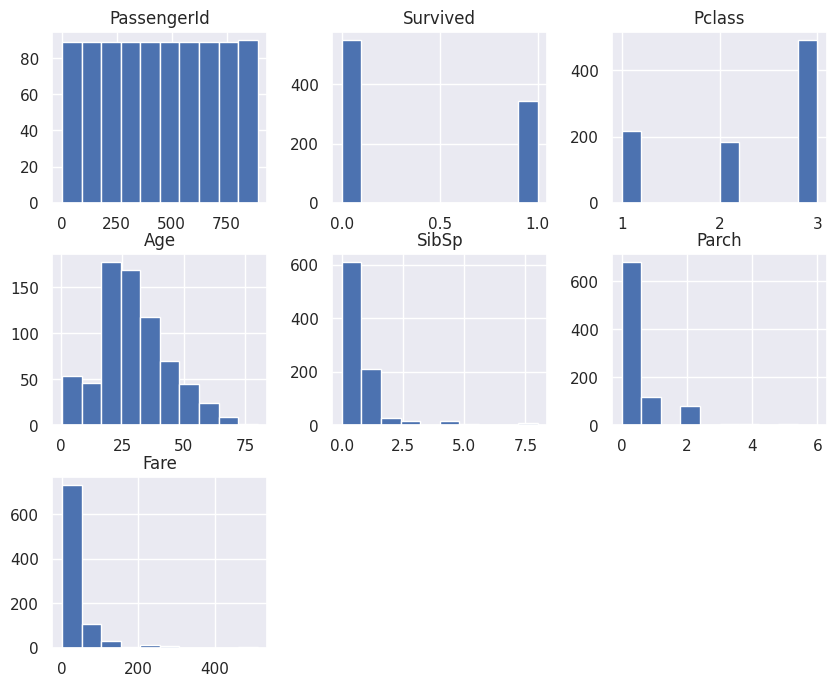

In [ ]:
# ver histograma das variáveis numéricas
train.hist(figsize=(10,8));



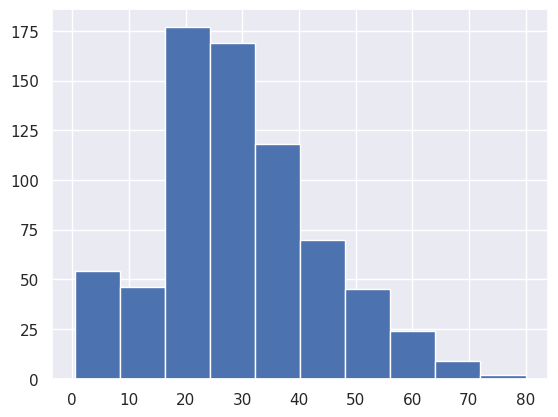

In [ ]:
# histograma por idade
plt.hist(train['Age'])
plt.show()

In [ ]:
# comparar correlacao entre idade e tarifa que pagaram

train['Age'].corr(train['Fare'])

0.0960666917690389

In [ ]:
# Calculo Media da idade sobrevientes 
sobreviventes = train.loc[train['Survived'] == 1]
sobreviventes['Age'].mean()

30.62617924528302

In [ ]:
# Calculo Media da idade sobrevientes 
morreram = train.loc[train['Survived'] == 0]
morreram['Age'].mean()

30.62617924528302

In [ ]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).count()

,Survived
Sex,
female,314
male,577


In [ ]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex']].value_counts()

Sex   
male      577
female    314
dtype: int64

In [ ]:
# Analisar a probabilidade de sobrevivência pelo sexo/sobreviventes
train[['Sex', 'Survived']].value_counts(normalize=True)

Sex     Survived
male    0           0.525253
female  1           0.261504
male    1           0.122334
female  0           0.090909
dtype: float64

In [ ]:
train[['Sex', 'Survived']].value_counts()

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

In [ ]:
#Crie a tabela dinamica para mostrar a media da idade dos passageiros por classe
df = pd.read_csv('train.csv')
pivot = df.pivot_table(values='Age', index='Pclass', aggfunc='mean')
print(pivot)

              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


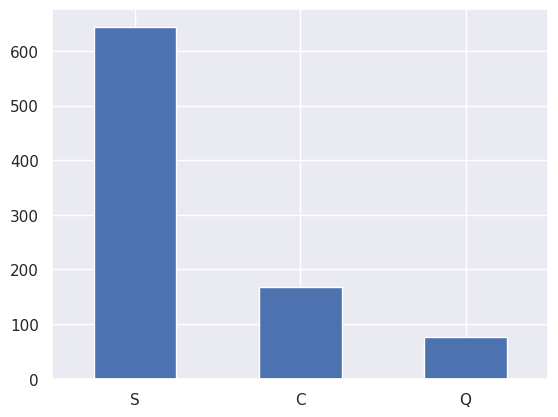

In [ ]:
#Grafico 
train['Embarked'].value_counts().plot.bar(rot=0)
plt.show()

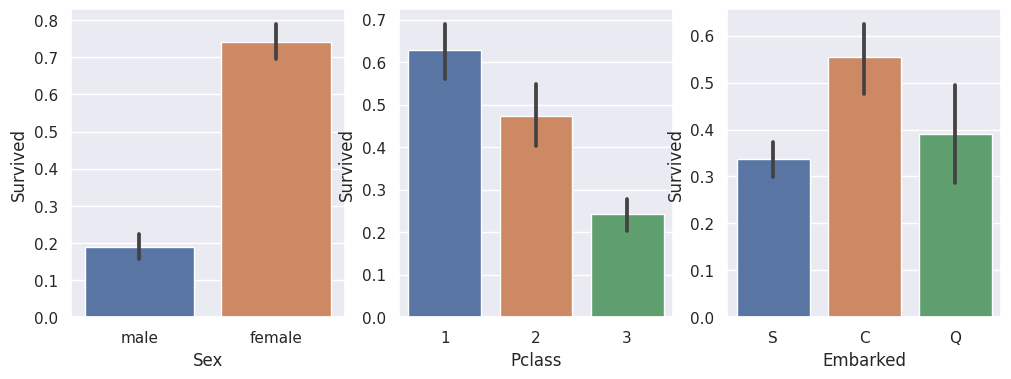

In [ ]:


# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);



/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


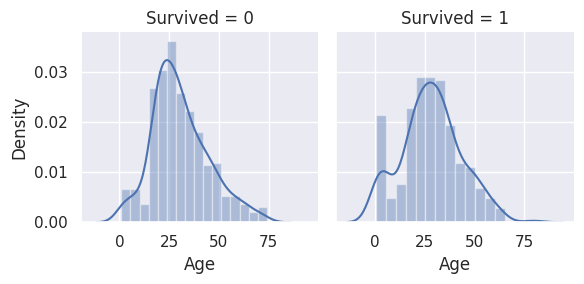

In [ ]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

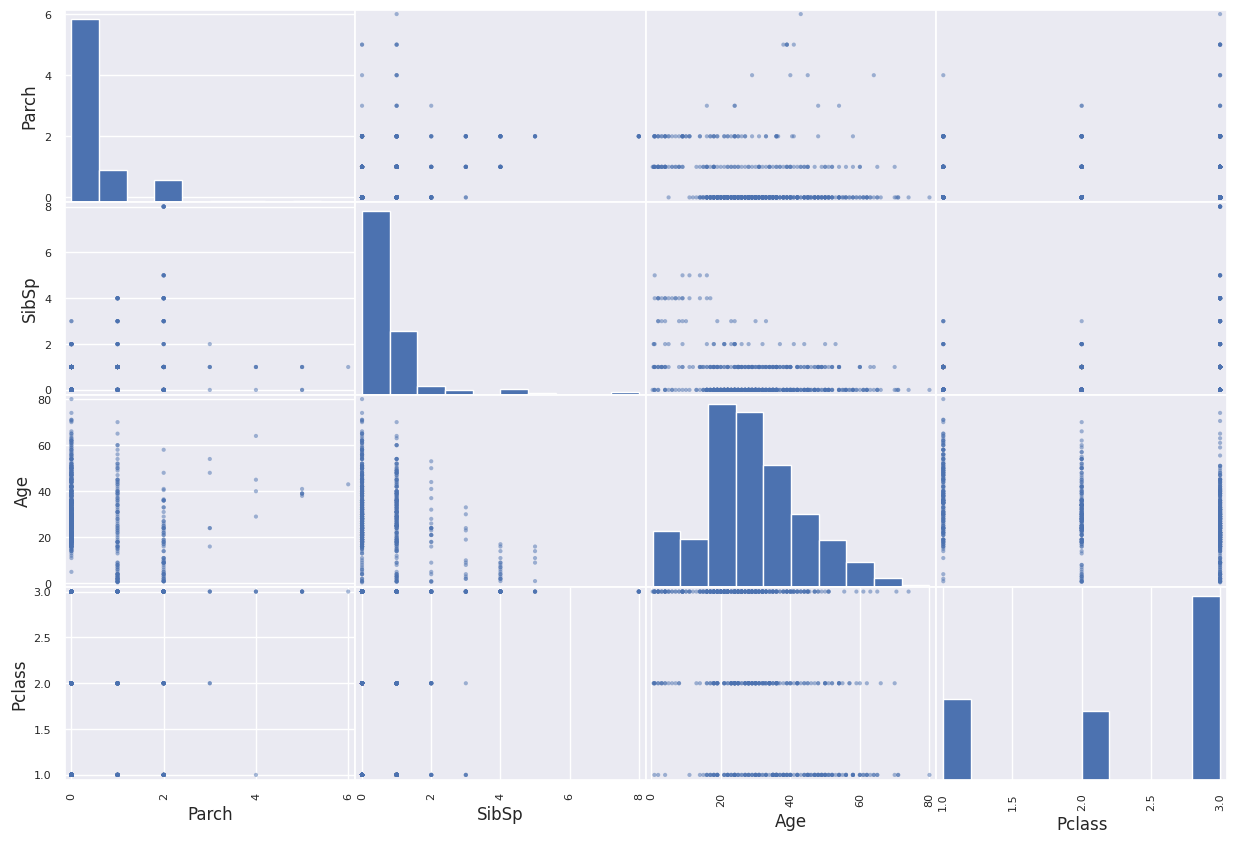

In [ ]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

<ipython-input-28-51dab433ab04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,


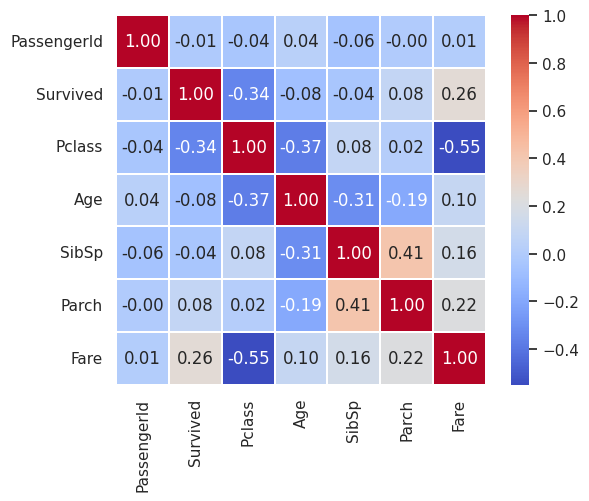

In [ ]:
# plotar o heatmap para as variáveis numéricas
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [ ]:
train.describe(include=['O'])



,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644



    Os valores para Name são únicos, um para cada pessoa;
    Não há missing values para Name e Sex;
    Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
    O Porto no qual embarcaram mais passageiros é o de S = Southampton.
